In [231]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Input
from keras.initializers import Constant
import random
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [210]:
with open ('intents2.json') as f:
    data = json.load(f)

In [211]:
X, y = [], []
resp = dict()
for i in data['intents']:
    s = i['tag']
    for j in i['patterns']:
        X.append(j)
        y.append(s)
    resp[i['tag']] = i['responses']

In [212]:
X[:10]

['Explain data abstraction.',
 'What is data abstraction?',
 'Define data abstraction.',
 'What is a syntax error',
 'Explain syntax error',
 'Why syntax error occurs?',
 'Explain program documentation. Why is it important?',
 'What is meant by program documentation?',
 'Why do we need program documentation?',
 'What is software testing?']

In [213]:
y[:10]

['abstraction',
 'abstraction',
 'abstraction',
 'error',
 'error',
 'error',
 'documentation',
 'documentation',
 'documentation',
 'testing']

In [214]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
seq = tokenizer.texts_to_sequences(X)

In [215]:
seq[:10]

[[2, 11, 45],
 [1, 3, 11, 45],
 [117, 11, 45],
 [1, 3, 21, 83, 84],
 [2, 83, 84],
 [85, 83, 84, 280],
 [2, 46, 86, 85, 3, 118, 281],
 [1, 3, 282, 119, 46, 86],
 [85, 54, 283, 284, 46, 86],
 [1, 3, 12, 47]]

In [216]:
maxlen = max([len(i) for i in seq])
maxlen

12

In [217]:
pad_seq = pad_sequences(seq, maxlen = maxlen, padding = 'post')

In [218]:
df = pd.DataFrame(data = y, columns = ['labels'])
df.head()

,labels
0,abstraction
1,abstraction
2,abstraction
3,error
4,error


In [219]:
classes = df['labels'].nunique()
classes

171

In [220]:
le = LabelEncoder()
y_le = le.fit_transform(df['labels'])

In [221]:
glove_file = open('glove.6B.100d.txt', encoding = 'utf-8')
embedding_matrix = dict()
for line in glove_file:
    record = line.split()
    word = record[0]
    vector = np.asarray(record[1:], dtype = 'float32')
    embedding_matrix[word] = vector
glove_file.close()

In [222]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

364

In [223]:
embedding_vectors = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    vec = embedding_matrix.get(word)
    if vec is not None:
        embedding_vectors[index] = vec

In [224]:
model = Sequential()

In [225]:
model.add(Embedding(vocab_size, 100, embeddings_initializer = Constant(embedding_vectors), trainable = False))
model.add(LSTM(20))
model.add(Dense(classes, activation = 'softmax'))

In [226]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [227]:
early_stopping = EarlyStopping(monitor = 'accuracy', patience = 10)

In [228]:
history = model.fit(pad_seq, y_le, epochs = 150, callbacks = [early_stopping])

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.0086 - loss: 5.1453
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0185 - loss: 5.1354
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0320 - loss: 5.1273
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0286 - loss: 5.1132 
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0315 - loss: 5.0997   
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0512 - loss: 5.0664
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0518 - loss: 5.0203
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0444 - loss: 4.9369
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0554 - loss: 4.8370
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1082 - loss: 4.6802
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1046 - loss: 4.5724
Epoch 12/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/s

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8814 - loss: 1.6012
Epoch 69/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8439 - loss: 1.6065
Epoch 70/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8589 - loss: 1.5962
Epoch 71/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8470 - loss: 1.5678
Epoch 72/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8589 - loss: 1.5674
Epoch 73/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8637 - loss: 1.4936
Epoch 74/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8766 - loss: 1.4845
Epoch 75/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9062 - loss: 1.4791
Epoch 76/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8365 - loss: 1.5380
Epoch 77/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8560 - loss: 1.4817
Epoch 78/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8799 - loss: 1.4593
Epoch 79/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - a

In [230]:
while True:
    text = input('You: ')
    if text == 'finish':
        break
    else:
        text_seq = tokenizer.texts_to_sequences([text])[0]
        pad_text = pad_sequences([text_seq], maxlen = maxlen, padding = 'post')
        pred = le.inverse_transform([np.argmax(model.predict(pad_text))])[0]
        print('Bot:', random.choice(resp[pred]))
        print('=======================================================================')

You: what are neural networks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Bot: Neural networks are a type of machine learning model inspired by the human brain that can process complex patterns and make predictions. Artificial neural networks consist of layers of interconnected nodes or neurons that receive input, apply activation functions, and produce output. Neural networks learn through a process called backpropagation, where errors in predictions are used to update the weights and biases of the network in order to improve its performance.
You: explain react component
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Bot: React is a popular JavaScript library for building user interfaces, particularly for web applications. React components are the building blocks of a React application, representing different parts of the user interface. Components can be reused and combined to create complex user interfaces. React hooks are functions that allow state and lifecycle features to be used in functional 

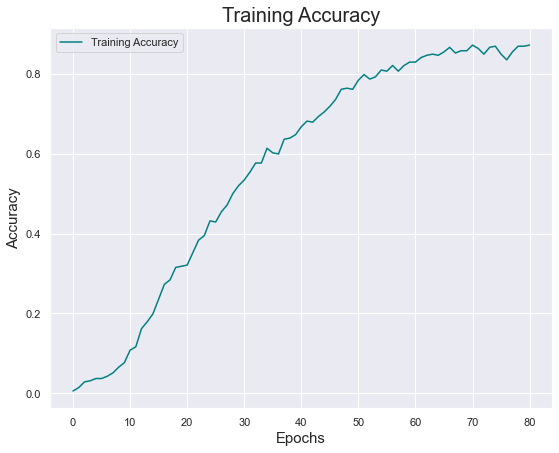

In [232]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.title('Training Accuracy', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

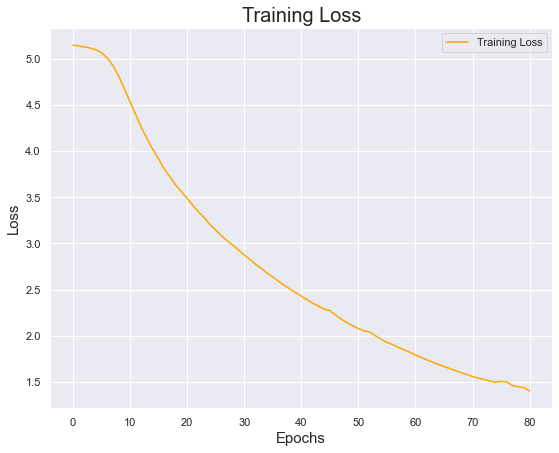

In [233]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'orange')
plt.title('Training Loss', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend()
plt.show()